In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score ## F1 Score 구하기
from sklearn.metrics import precision_recall_fscore_support as sk
from imblearn.over_sampling import SMOTE

In [2]:
#먼저 데이터 읽어오기
df=pd.read_excel('../optimal_data3_1/'+'Continous_2weeks_2day_1term.xlsx')
df.head()
X=df.iloc[:,[1,3,4,5,6,7]]
y=df.iloc[:,-1]

In [3]:
#스케일링 먼저 하고 ndarray를 dataframe으로 변환
scaler = StandardScaler()
X=scaler.fit_transform(X)
X=pd.DataFrame(X)

#결과 넣을 배열
Result=[[0 for j in range(4)] for i in range(10)]

Count= int(322/10)*83

C:\Users\user\AppData\Local\Temp\ipykernel_13148\3365877275.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model= RandomForestClassifier(max_depth=2, random_state=0).fit(X_train,y_train)


[0]Accuracy : 0.5132850241545893
[0]F1score : 0.6261151675702394
[0]Precision : 0.8623009357095727
[0]Recall : 0.5132850241545893



C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


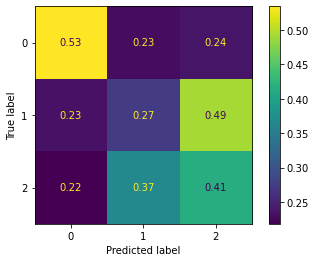

C:\Users\user\AppData\Local\Temp\ipykernel_13148\3365877275.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model= RandomForestClassifier(max_depth=2, random_state=0).fit(X_train,y_train)


[1]Accuracy : 0.5172532781228434
[1]F1score : 0.6247848875321518
[1]Precision : 0.8574629082965938
[1]Recall : 0.5172532781228434



C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


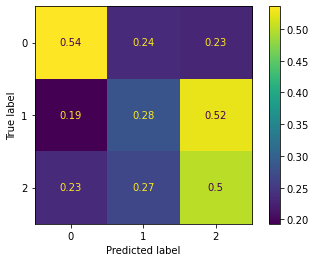

C:\Users\user\AppData\Local\Temp\ipykernel_13148\3365877275.py:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model= RandomForestClassifier(max_depth=2, random_state=0).fit(X_train,y_train)


In [ ]:
#한 사람당 데이터 수
Count_1=int(181*0.1)
#한 사람당 데이터 수
Count_2=181

X_test=pd.DataFrame()
X_train=pd.DataFrame()
y_test=pd.DataFrame()
y_train=pd.DataFrame()
empty=pd.DataFrame()

for i in range(10):
    X_test=empty
    X_train=empty
    y_test=empty
    y_train=empty
    for j in range(322):
        X_temp_test=X.iloc[Count_2*j+Count_1*i:Count_2*j+Count_1*(i+1)]
        X_test=pd.concat([X_test,X_temp_test])
        X_temp_train=X.iloc[Count_2*j+Count_1:Count_2*(j+1)]
        X_train=pd.concat([X_train,X_temp_train])
        
        y_temp_test=y.iloc[Count_2*j+Count_1*i:Count_2*j+Count_1*(i+1)]
        y_test=pd.concat([y_test,y_temp_test])
        y_temp_train=y.iloc[Count_2*j+Count_1:Count_2*(j+1)]
        y_train=pd.concat([y_train,y_temp_train])
    
    #SMOTE 적용
    smote = SMOTE(random_state=0)
    X_train,y_train = smote.fit_resample(X_train,y_train)
#     X_test,y_test = smote.fit_resample(X_test,y_test)
    
    #모델 정의, 예측
    model= RandomForestClassifier(max_depth=2, random_state=0).fit(X_train,y_train)
    
    predict=model.predict(X_test)
    
    #Accuracy
    print("[{}]Accuracy : {}".format(i,model.score(X_test,y_test)))
    #f1score
    f1 = f1_score(y_test,predict,pos_label='positive', average='weighted')
    print("[{}]F1score : {}".format(i,f1))
    #precision/recall
    list=sk(y_test,predict,average='weighted')
    print("[{}]Precision : {}".format(i,list[0]))
    print("[{}]Recall : {}".format(i,list[1]))
    print()
    
    #결과 배열에 넣기
    Result[i][0]=model.score(X_test,y_test)
    Result[i][1]=f1
    Result[i][2]=list[0]
    Result[i][3]=list[1]
    
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
    import matplotlib.pyplot as plt

    confusion_matrix(y_test, predict)

    cm = confusion_matrix(y_test, predict, labels=[0,1,2],normalize="true")
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[0,1,2])
    disp.plot()
    filename=("ConfusionMatrix_"+str(i))
    plt.savefig(filename+".png")
    plt.show()

In [ ]:
Result_df=pd.DataFrame(Result,columns=['Accuracy','F1-Score','Precision','Recall'])

In [ ]:
print("Average of Accuracy {}".format(Result_df['Accuracy'].mean()))
print("Average of F1-Score {}".format(Result_df['F1-Score'].mean()))
print("Average of Precision {}".format(Result_df['Precision'].mean()))
print("Average of Recall {}".format(Result_df['Recall'].mean()))


In [ ]:
Matrix=pd.DataFrame(Result_df['Accuracy'],columns=['Accuracy'])
Matrix['Accuracy']=Result_df['Accuracy']
A=[Result_df['Accuracy'].mean(),Result_df['F1-Score'].mean(),Result_df['Precision'].mean(),Result_df['Recall'].mean()]
A=pd.DataFrame(A,columns=['Accuracy'])
Matrix=pd.concat([Matrix,A])
Matrix=Matrix.transpose()
Matrix.to_excel('./PFMatrix.xlsx')